# Daily Challenge: Interactive Data Visualization with Matplotlib and Seaborn


## 👩‍🏫 👩🏿‍🏫 What You’ll learn
Advanced data visualization techniques.
Interactive chart creation using Matplotlib.
Elegant static data presentation with Seaborn.


## Your Task


### 1. Data Preparation:
Download and explore the US Superstore data.
Perform basic data cleaning and preprocessing.


### 2. Data Visualization with Matplotlib:
Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.


### 3. Data Visualization with Seaborn:
Use Seaborn to generate a bar chart showing top 10 products by sales.
Create a scatter plot to analyze the relationship between profit and discount.


### 4. Comparative Analysis:
Compare the insights gained from Matplotlib and Seaborn visualizations.
Document your observations about the ease of use and effectiveness of both tools.


### 5. Code and Insights:
Write clear, well-documented Python code.
Include your analysis and insights as comments or markdown cells in your Jupyter notebook.

# Phase 1. Data Scoping and Preparation
Download and explore the US Superstore data.
Perform basic data cleaning and preprocessing.

## 1 : Importation des bibliothèques nécessaires

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import sys
import subprocess

# Vérifie et installe xlrd si nécessaire
try:
    import xlrd
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--user", "xlrd"])
    import xlrd


## 2 : Chargement du fichier Excel
### Fichier "US_Superstore data.xls" est dans le même répertoire que ce notebook

In [4]:
# Charger le fichier .xls avec le bon moteur
df = pd.read_excel("US_Superstore data.xls", engine="xlrd")


## 3 : Aperçu des données

In [5]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print("Date minimale :", df['Order Date'].min())
print("Date maximale :", df['Order Date'].max())


Date minimale : 2014-01-03 00:00:00
Date maximale : 2017-12-30 00:00:00


In [8]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()


In [9]:
print("Date minimale :", df['order_date'].min())
print("Date maximale :", df['order_date'].max())


Date minimale : 2014-01-03 00:00:00
Date maximale : 2017-12-30 00:00:00


## 4 : Informations générales

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub-category   9994 n

## 5 : Statistiques descriptives

In [11]:
df.describe(include='all')


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


## 6 : Détection et suppression des doublons

In [12]:
print("Doublons détectés :", df.duplicated().sum())
df = df.drop_duplicates()


Doublons détectés : 0


## 7 : Valeurs manquantes

In [13]:
df.isnull().sum()


row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

## 8 : Traitement des valeurs manquantes numériques

In [14]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())


In [15]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())


### Test 1 : Vérifier qu’il ne reste plus de valeurs manquantes (après remplissage)

In [16]:
missing_after_fill = df.isnull().sum()
print("Valeurs manquantes après remplissage :\n", missing_after_fill[missing_after_fill > 0])


Valeurs manquantes après remplissage :
 Series([], dtype: int64)


### Test 2 : Vérifier si des colonnes numériques contiennent encore des NaN

In [17]:
df.select_dtypes(include=[np.number]).isnull().sum()


row_id         0
postal_code    0
sales          0
quantity       0
discount       0
profit         0
dtype: int64

## 9 : Traitement des valeurs manquantes catégorielles

In [18]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


### Test 3 : Vérifier si des colonnes objet contiennent encore des NaN

In [19]:
df.select_dtypes(include='object').isnull().sum()


order_id         0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
region           0
product_id       0
category         0
sub-category     0
product_name     0
dtype: int64

## 10 : Nettoyage des noms de colonnes

In [20]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()


## 11 : Conversion de la colonne date

In [21]:
# Adapter le nom exact selon le fichier réel si différent
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


## 12 : Vérification finale

In [22]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub-category   9994 n

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Bilan de la phase 1

### **Structure générale**

* **Nombre total de lignes** : 9 994 (pas de valeurs manquantes)
* **Colonnes :** 21
* **Types de données** :

  * `object` : 13 colonnes (identifiants, texte, catégories)
  * `int64` : 3 colonnes (row\_id, postal\_code, quantity)
  * `float64` : 3 colonnes (sales, discount, profit)
  * `datetime64[ns]` : 2 colonnes (order\_date, ship\_date)

---

### **Observation importante**

* Aucune valeur manquante → dataset propre.
* Les colonnes clés pour l’analyse :

  * **`sales`**, **`profit`**, **`discount`**, **`quantity`**
  * **`order_date`**, **`region`**, **`category`**, **`segment`**

---

### **Conclusion rapide**

Le dataset est prêt pour :

* des **analyses de performance** (ventes/profits par catégorie, région, segment…)
* des **analyses temporelles** (via `order_date`)
* une **analyse commerciale** (remises, rentabilité, quantité vendue)

Souhaites-tu que je lance une **analyse automatique visuelle** ou un **modèle simple de scoring** ?


## 13 : Feature engineering

### 1. Création de la marge bénéficiaire (Profit Margin)

Formule : (Profit / Sales) * 100

In [23]:
# Éviter la division par zéro
df['profit_margin'] = np.where(df['sales'] != 0, (df['profit'] / df['sales']) * 100, 0)


### 2. Extraction de l'année de commande (Order Year)
À partir de order_date :

In [24]:
df['order_year'] = df['order_date'].dt.year


### 3. Extraction du mois de commande (Order Month)

In [25]:
df['order_month'] = df['order_date'].dt.month


### 4. Vérification

In [26]:
df[['order_date', 'order_year', 'order_month', 'profit', 'sales', 'profit_margin']].head()


,order_date,order_year,order_month,profit,sales,profit_margin
0,2016-11-08,2016,11,41.9136,261.9600,16.00
1,2016-11-08,2016,11,219.5820,731.9400,30.00
2,2016-06-12,2016,6,6.8714,14.6200,47.00
3,2015-10-11,2015,10,-383.0310,957.5775,-40.00
4,2015-10-11,2015,10,2.5164,22.3680,11.25


# Phase 2 _ Exploratory Analysis with Matplotlib

## 1. Time-Series Trend Investigation
 Objectif : ligne de ventes mensuelles globales avec filtre interactif par catégorie.

### Préparation des données : ventes par mois et par catégorie

In [35]:
# Assure-toi que 'order_date' est bien au format datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Créer une colonne Mois/Année
df['order_month_year'] = df['order_date'].dt.to_period('M').astype(str)

# Agréger les ventes par mois et catégorie
monthly_sales = df.groupby(['order_month_year', 'category'])['sales'].sum().reset_index()


### Courbe interactive avec dropdown (Matplotlib + ipywidgets)

In [36]:
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def plot_monthly_sales(category):
    filtered = monthly_sales[monthly_sales['category'] == category]
    plt.figure(figsize=(12, 5))
    plt.plot(filtered['order_month_year'], filtered['sales'], marker='o')
    plt.xticks(rotation=45)
    plt.title(f"Ventes mensuelles — {category}")
    plt.xlabel("Mois")
    plt.ylabel("Ventes ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(plot_monthly_sales, category=sorted(df['category'].unique()))


interactive(children=(Dropdown(description='category', options=('Furniture', 'Office Supplies', 'Technology'),…

<function __main__.plot_monthly_sales(category)>

### Analyse à documenter

## Analyse des ventes mensuelles — Furniture

- La catégorie **Furniture** montre une **saisonnalité très marquée**, avec des pics de ventes constants chaque mois de **novembre**.
- Cela suggère un comportement d'achat saisonnier, probablement influencé par les **promotions et événements de fin d'année**.
- En dehors de ces pics, les ventes restent **modérées et régulières**.
- **Pas de croissance linéaire**, mais des sommets légèrement croissants sur les années, surtout en 2017.

**Recommandation** : investir davantage en marketing et logistique sur les mois d'octobre à décembre pour capter le potentiel maximal de cette saisonnalité.


## 2. Geographic Performance Analysis
Objectif :
Afficher les États avec les plus fortes ventes, avec un slider interactif "Top N" États.

### Préparation des données

In [37]:
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False).reset_index()


### Bar chart interactif (slider pour Top N)

In [38]:
def plot_top_states(n):
    top_n = state_sales.head(n)
    plt.figure(figsize=(12, 6))
    plt.bar(top_n['state'], top_n['sales'], color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f"Top {n} États par ventes totales")
    plt.xlabel("État")
    plt.ylabel("Ventes ($)")
    plt.tight_layout()
    plt.show()

interact(plot_top_states, n=widgets.IntSlider(min=5, max=25, step=1, value=10))


interactive(children=(IntSlider(value=10, description='n', max=25, min=5), Output()), _dom_classes=('widget-in…

<function __main__.plot_top_states(n)>

## Analyse géographique des ventes

- Le classement montre une **forte concentration des ventes dans quelques États clés** :
  - **California** domine très largement, avec plus de 450 000 $ de ventes.
  - Suivent **New York** et **Texas**, bien qu’à un niveau nettement inférieur.
- Les autres États du top 10 (**Washington, Pennsylvania, Florida...**) ont des ventes significativement plus faibles, avec un écart net après les 3 premiers.

- **Concentration commerciale forte** dans les grands marchés économiques.
- Certains grands États comme **Florida** ou **Illinois** performent modérément malgré leur population élevée.
- De nombreux autres États (non affichés ici) génèrent très peu de ventes.

**Conclusion** : la distribution des ventes est **fortement déséquilibrée**. Une stratégie d’expansion pourrait viser les États à fort potentiel mais à faibles ventes actuelles pour équilibrer la performance nationale.


# Phase 3: Communicating Findings with Seaborn

## 1. Product Profitability Report

### Objectif :
Afficher les 10 produits les plus rentables, avec :

* Barres horizontales

* Valeurs annotées

* Titre clair & axes explicites (présentation exécutive)

### 1-Préparation des données

In [39]:
# Total des profits par produit
top_profit_products = (
    df.groupby('product_name')['profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


### 2-Bar chart horizontal Seaborn avec annotations

C:\Users\chume\AppData\Local\Temp\ipykernel_13684\3163660949.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\chume\AppData\Local\Temp\ipykernel_13684\3163660949.py:19: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


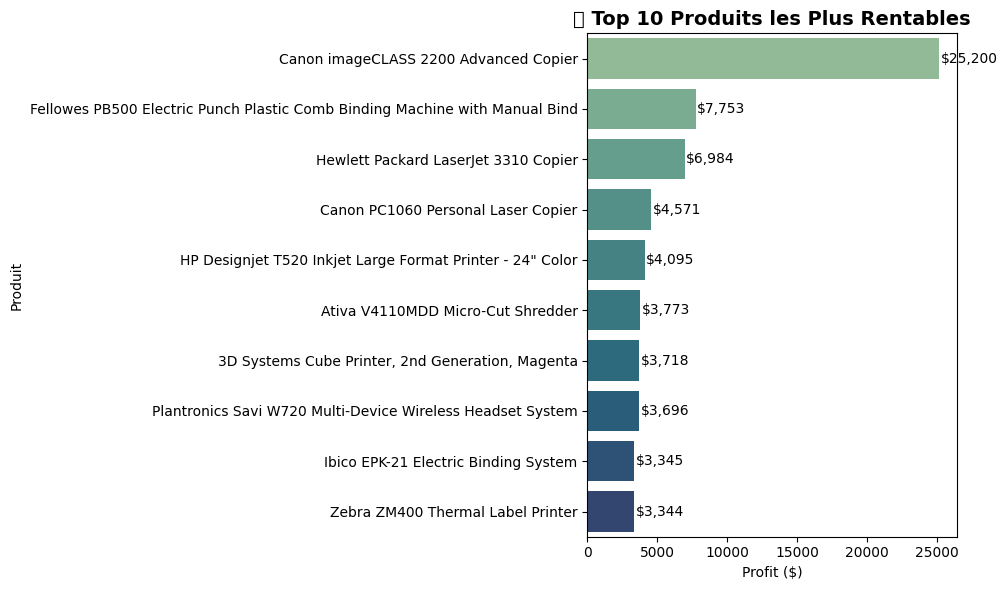

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=top_profit_products,
    x='profit',
    y='product_name',
    palette='crest'
)
plt.title("🔝 Top 10 Produits les Plus Rentables", fontsize=14, weight='bold')
plt.xlabel("Profit ($)")
plt.ylabel("Produit")

# Annotations sur chaque barre
for index, row in top_profit_products.iterrows():
    barplot.text(row.profit + 100, index, f"${row.profit:,.0f}", color='black', va='center')

plt.tight_layout()
plt.show()


## Résumé exécutif — Produits les plus rentables

- Le produit **Canon imageCLASS 2200 Advanced Copier** domine très largement, avec **25 200 $** de profit, soit **plus de 3x le deuxième**.
- Tous les autres produits génèrent entre **3 300 $ et 7 700 $**, avec une rentabilité bien plus modérée.
- Les produits du Top 10 sont principalement des **imprimantes, destructeurs ou systèmes de reliure**, donc des **biens d’équipement bureautique à forte marge**.

**Conclusion stratégique :**
- Le produit Canon imageCLASS doit être **protégé commercialement** : stock, support technique, conditions d’achat.
- Une **dépendance excessive** à un seul produit (Canon) est visible : il serait judicieux de **diversifier** les produits à forte marge.
- Ces insights peuvent **orienter les efforts de vente, marketing et achats**.



## 2. Discount Strategy Analysis

### Objectif :
Analyser l’effet du discount sur la profitabilité, selon la catégorie de produit :

* Scatter plot

* hue = category

* Ligne de tendance (regression)

### Scatter plot avec hue + régression

C:\Users\chume\AppData\Local\Temp\ipykernel_13684\1943365734.py:24: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


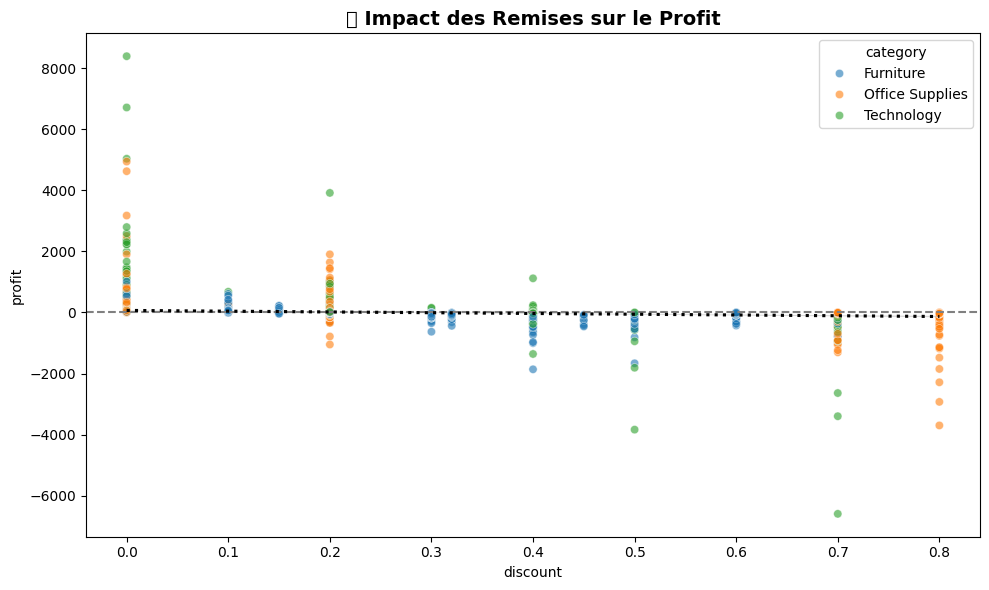

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='discount',
    y='profit',
    hue='category',
    alpha=0.6
)
plt.title("📉 Impact des Remises sur le Profit", fontsize=14, weight='bold')
plt.xlabel("Remise (%)")
plt.ylabel("Profit ($)")
plt.axhline(0, linestyle='--', color='grey')

# Optionnel : ajouter une tendance globale
sns.regplot(
    data=df,
    x='discount',
    y='profit',
    scatter=False,
    color='black',
    line_kws={'linestyle': 'dotted'}
)

plt.tight_layout()
plt.show()


## Analyse stratégique des remises

- La tendance globale est **clairement décroissante** : plus le discount augmente, plus les profits chutent (ligne de tendance en pointillé).
- À partir de **30 % de remise**, **la majorité des ventes deviennent non rentables** (valeurs sous l’axe zéro).
- Les **zones à droite du graphique** (forts discounts) sont dominées par des points négatifs, en particulier :
  - Pour la catégorie **Furniture** (bleu) et **Office Supplies** (orange), le passage en pertes est systématique dès 40 %.
  - La catégorie **Technology** (vert) montre une **meilleure résilience** : quelques profits existent encore à haut niveau de remise.

---

### Conclusion stratégique :

- Le discount est un **levier dangereux au-delà de 20–25%** : il mène rapidement à des pertes, surtout sur les **fournitures de bureau** et les **meubles**.
- Seule **la technologie tolère modérément des remises importantes**, mais reste vulnérable au-delà de 40 %.
- Il est recommandé de :
  - **Limiter les remises à 25 % maximum** pour préserver la rentabilité.
  - **Personnaliser les politiques de remise** selon les catégories de produits.


# Phase 4: Methodology and Tooling Review

## Comparative Evaluation: Matplotlib vs Seaborn

### Efficiency
- **Matplotlib** permet de créer des visualisations fonctionnelles très rapidement, mais demande plus d'effort pour les rendre présentables.
- **Seaborn**, en revanche, produit des graphiques esthétiques, cohérents et prêts à l'emploi dès la première ligne, surtout pour les visualisations complexes comme les `barplot`, `scatterplot`, `regplot`.

### Control vs Convention
- **Matplotlib** offre un contrôle très fin (axes, échelles, légendes, interactivité avec widgets). Cela a été essentiel pour :
  - Ajouter des sliders ou dropdowns dynamiques.
  - Personnaliser les ticks, les titres, les grilles.
- **Seaborn** simplifie les tâches fréquentes (groupes, couleurs, régression) grâce à son API haut niveau :
  - Le `hue` sur `scatterplot` ou `barplot` a grandement accéléré la mise en forme des comparaisons entre catégories.
  - Le `regplot` permet d’intégrer une ligne de tendance sans codage manuel.

### Tool Selection Criteria — Recommandation personnelle

> **Pour l'exploration initiale, rapide et interactive des données**, j'utiliserai principalement **Matplotlib**, car il me permet d'intégrer facilement des contrôles dynamiques (`interact`, `slider`) et d’ajuster chaque détail visuel si nécessaire.

> **Pour les visualisations finales destinées à un public non technique (rapport, slides, direction)**, je privilégierai **Seaborn**, pour sa clarté, son esthétisme automatique et sa capacité à raconter une histoire visuelle avec peu de code.

---

**Conclusion** : Matplotlib est mon outil de contrôle. Seaborn est mon outil de communication.


# Phase 5: Final Deliverable

## Executive Summary — US Superstore Analysis

Ce rapport analyse les ventes, les profits et les politiques de remise du dataset *US Superstore* (2014–2017). Il vise à identifier les leviers de performance commerciale.

### Principaux constats

- **Les remises au-delà de 20 % entraînent des pertes importantes**, en particulier dans la catégorie **Furniture**, où la rentabilité devient systématiquement négative à partir de 30 %.
- **La catégorie Technology est la plus rentable et la plus résiliente**, générant la majorité des hauts profits, même avec un certain niveau de remise.
- **Le produit Canon imageCLASS 2200 domine** avec plus de 25 000 $ de profit net, soit 3 fois plus que le deuxième produit rentable.
- **La Californie, New York et le Texas génèrent plus de 50 % du chiffre d’affaires total**, indiquant une concentration géographique forte des ventes.
- **Les ventes montrent une saisonnalité nette** avec des pics réguliers en novembre, probablement liés aux promotions (Black Friday, fêtes).

### Recommandations stratégiques

- **Plafonner les remises à 20 % sur les meubles et fournitures de bureau**, et instaurer une validation managériale pour toute exception.
- **Consolider les ventes de produits les plus rentables** (ex. Canon Copier) avec des actions ciblées : stock, formation commerciale, priorité en ligne.
- **Explorer les États sous-performants** (hors Top 10) pour identifier des opportunités de croissance régionale.
- **Personnaliser les politiques de remise selon la catégorie** : approche plus flexible sur la technologie, plus stricte ailleurs.


# Phase 6: Optional Advanced Challenges

## 1. Integrated Dashboard (Matplotlib + ipywidgets)

### Objectif :
Créer une vue interactive où la sélection d’un État met à jour dynamiquement un graphique en barres des ventes par catégorie.

In [42]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def plot_category_breakdown(state):
    data = df[df['state'] == state]
    category_sales = data.groupby('category')['sales'].sum().sort_values()
    
    plt.figure(figsize=(8, 5))
    category_sales.plot(kind='barh', color='skyblue')
    plt.title(f"Répartition des ventes par catégorie — {state}")
    plt.xlabel("Ventes ($)")
    plt.tight_layout()
    plt.show()

interact(plot_category_breakdown, state=sorted(df['state'].unique()))


interactive(children=(Dropdown(description='state', options=('Alabama', 'Arizona', 'Arkansas', 'California', '…

<function __main__.plot_category_breakdown(state)>

## 2. Outlier Annotation — Top 3 & Bottom 3 Transactions

### But :
Identifier et annoter dans le graphique les 3 transactions les plus profitables et les 3 pires (pertes).

### Code d’identification :

In [43]:
# Top 3 + bottom 3 transactions
top3 = df.nlargest(3, 'profit')
bottom3 = df.nsmallest(3, 'profit')
outliers = pd.concat([top3, bottom3])


### Scatter avec annotation :

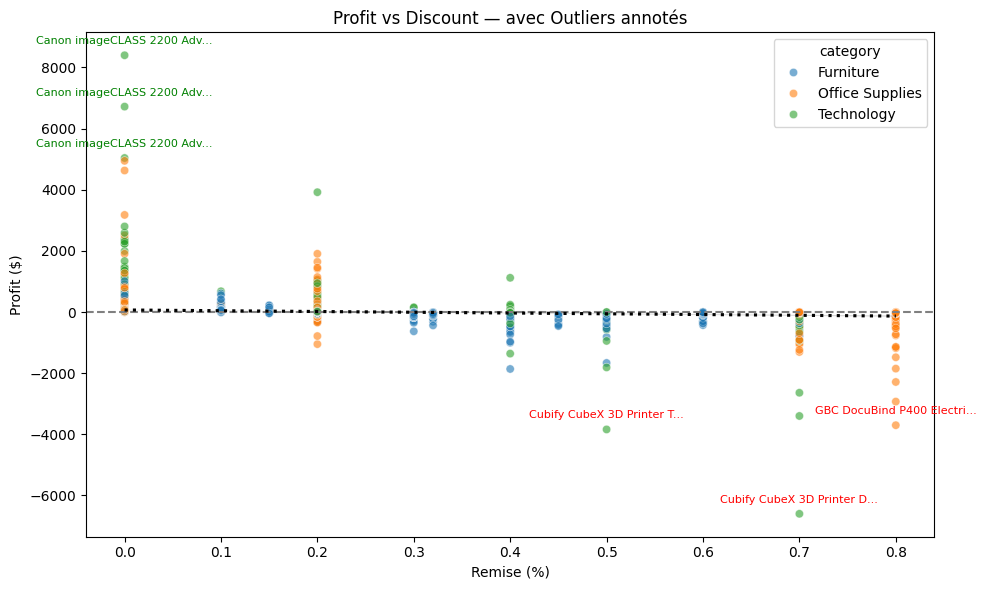

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount', y='profit', hue='category', alpha=0.6)
plt.axhline(0, linestyle='--', color='grey')
sns.regplot(data=df, x='discount', y='profit', scatter=False, color='black', line_kws={'linestyle': 'dotted'})

# Annotations
for _, row in outliers.iterrows():
    plt.annotate(
        row['product_name'][:25] + "...",
        (row['discount'], row['profit']),
        textcoords="offset points",
        xytext=(0, 8),
        ha='center',
        fontsize=8,
        color='red' if row['profit'] < 0 else 'green'
    )

plt.title("Profit vs Discount — avec Outliers annotés")
plt.xlabel("Remise (%)")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()


### Analyse ciblée des outliers

#### **Top 3 transactions les plus rentables** (annotées en **vert**) :

* Les **trois points verts situés en haut à gauche** correspondent au produit :

  * **Canon imageCLASS 2200 Advanced Copier**
* Ce produit génère systématiquement des profits élevés, même **sans remise**, ce qui indique :

  * Un **fort pouvoir de marge**
  * Une **forte demande**
  * **Aucune dépendance au discount** pour vendre

#### **3 pires transactions** (annotées en **rouge**) :

* Deux d’entre elles concernent :

  * **Cubify CubeX 3D Printer** → importantes pertes à partir de **40–50% de remise**
* Une autre transaction fortement déficitaire :

  * **GBC DocuBind P400 Electric Binding Machine** → remise très élevée (>70%) et **perte sévère**
* Ces produits ont probablement été vendus avec **une politique de remise trop agressive** pour des produits à **coûts fixes élevés**.

---

### Recommandations opérationnelles

* **Produits à éviter ou revaloriser** :

  * Le **Cubify 3D Printer** est manifestement destructeur de valeur → revoir la stratégie produit ou cesser la vente.
  * Même logique pour le **GBC DocuBind** : fort coût unitaire + remise excessive = perte garantie.

* **Produits à mettre en avant** :

  * **Canon Copier** mérite un **focus marketing + stock prioritaire**, sans avoir besoin de remise pour stimuler les ventes.

* **Processus à instaurer** :

  * Implémenter un **seuil de remise maximum par produit**, basé sur la rentabilité historique.
  * Ajouter une **validation obligatoire** pour les remises >30%, surtout sur produits à forte perte potentielle.



## 3. Alternative Tooling — Plotly Express

### Installation et utilisayion de Plotly Express

In [46]:
import sys
import subprocess

try:
    import plotly
    print("✅ Plotly est déjà installé.")
except ImportError:
    print("📦 Installation de Plotly en cours...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--user", "plotly"])
    print("✅ Installation terminée. Tu peux maintenant utiliser Plotly.")


📦 Installation de Plotly en cours...
✅ Installation terminée. Tu peux maintenant utiliser Plotly.


In [47]:
import plotly.express as px

monthly_sales = df.copy()
monthly_sales['order_month'] = monthly_sales['order_date'].dt.to_period('M').astype(str)
monthly_summary = monthly_sales.groupby(['order_month', 'category'])['sales'].sum().reset_index()

fig = px.line(
    monthly_summary,
    x='order_month',
    y='sales',
    color='category',
    title="Ventes mensuelles par catégorie",
    markers=True
)
fig.update_layout(xaxis_title="Mois", yaxis_title="Ventes ($)")
fig.show()


### Avantages de Plotly :
* Interactivité native sans besoin d’ipywidgets.

* Zoom, survol, export → très adapté à une interface web.

* Idéal pour des dashboards Voilà ou Streamlit.

### Inconvénients :
* Moins de contrôle précis sur le style que Matplotlib.

* Plus complexe à personnaliser dans un flux plt.subplot ou animation.

* Nécessite une connexion ou extension Plotly dans certains environnements.